## 출력하기

In [4]:
a = "이름"
print(f"안녕하세요 {a}입니다")

안녕하세요 이름입니다


<h2> 미니 실습 1: 네 정수의 최댓값을 구하는 함수를 작성하고, 값을 입력받아 최댓값을 출력하라 </h2>

In [12]:
def compare(a,b):
    if a > b :
        return a
    if b >= a :
        return b

In [15]:
a = int(input( "숫자를 입력하세요"))
b = int(input( "숫자를 입력하세요"))
c = int(input( "숫자를 입력하세요"))
d = int(input( "숫자를 입력하세요"))
Max = 0

숫자를 입력하세요1
숫자를 입력하세요35
숫자를 입력하세요23
숫자를 입력하세요7


In [16]:
Max = compare(Max,a)
Max = compare(Max,b)
Max = compare(Max,c)
Max = compare(Max,d)
print(Max)

35


## 미니실습 2
### 다음은 A, B 두 수도 회사의 요금 체계이다.
> A : 1L당 요즘 100원,
> B : 50리터 이하 1L당 요금 150원, 50리터 초과는 1L당 75원
* 수도 회사와 수도 사용량을 입력 받아서 지불 해야하는 수도 요금을 계산하는 waterPay()를 만들고, 수도 회사와 수도 사용량을 입력 받아 요금을 출력하라.


In [17]:
def waterPay(comA, comB):
    if comB <= 50:
        comB_pay = comB*150
    if comB > 50:
        comB_pay = comB*75
    comA_pay = comA*100
    return comA_pay + comB_pay

In [19]:
comA = 500
comB = 250
waterPay(comA,comB)

68750

* 궁금해서 하게된 문제 - 내가 50000원이 있을 때 어디에 넣어야 되는가?

In [24]:
import pulp

In [79]:
gallon = int(input("몇 리터 충전하시겠습니까?"))
# 목적식
linearProblem = pulp.LpProblem("Minimizing for first objective",pulp.LpMinimize)


x1 = pulp.LpVariable("ComA", lowBound = 0)
x2 = pulp.LpVariable("ComB", lowBound = 0)

linearProblem += x1 + x2
# 목적식
if x2 >= 50:
    linearProblem += 100*x1 + 75*x2
if x2 <= 50:
    linearProblem += 100*x1 + 150*x2
    
# 제약식
linearProblem += x1 + x2 == gallon

# 최적화 솔루션
solution = linearProblem.solve()

print(str(pulp.LpStatus[solution])+" ; min value = " +str(pulp.value(linearProblem.objective))+
      " ; x1_opt = "+str(pulp.value(x1))+
      " ; x2_opt = "+str(pulp.value(x2)))

몇 리터 충전하시겠습니까?55
Optimal ; min value = 5500.0 ; x1_opt = 55.0 ; x2_opt = 0.0


## 미니실습 3
### 앞 페이지의 코드에서 for loop 안의 if 문에서 앞부분 if는 반복 시에 대부분 시행되지만 else 부분은 맨 마지막에만 시행된다.
### 따라서 else 에 해당하는 부분을 반복 부분이 아니고 반복이 끝난 이후에 시행되도록 코드를 변경하라.

In [46]:
print('a부터b까지정수의합을구합니다.')
a = int(input('정수a를입력하세요.: '))
b = int(input('정수b를입력하세요.: '))

if a > b:
    a, b = b, a
sum = 0
for i in range(a, b+1):
    if i < b:
        print(f'{i} + ', end='')
    sum += i
print(f'{i} = ', end='')    
print(sum)

a부터b까지정수의합을구합니다.
정수a를입력하세요.: 1
정수b를입력하세요.: 50
1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10 + 11 + 12 + 13 + 14 + 15 + 16 + 17 + 18 + 19 + 20 + 21 + 22 + 23 + 24 + 25 + 26 + 27 + 28 + 29 + 30 + 31 + 32 + 33 + 34 + 35 + 36 + 37 + 38 + 39 + 40 + 41 + 42 + 43 + 44 + 45 + 46 + 47 + 48 + 49 + 50 = 1275


## 미니실습 4
### 앞 페이지의 코드에서는 두 변의 길이 순서를 고려하지 않고 가능한 조합만 표시되었다.
### 앞 변과 뒷 변의 길이를 고려하여 가능한 모든 경우가 표시되게 수정하여라

In [84]:
area = int(input(' 직사각형의 넓이를 입력하요.: '))

for i in range(1, area + 1):
    if area %i : 
        continue
    print(f'{i}x{area//i}')

 직사각형의 넓이를 입력하요.: 32
1x32
2x16
4x8
8x4
16x2
32x1


### 실습 1
#### 다음과 같이 계산되는 전기 요금 산출 함수 electricPay()를 만들고, 전사용량(kWh)을 인수로 전해주면 전기 요금(원)을 계산하여 return해 준다.
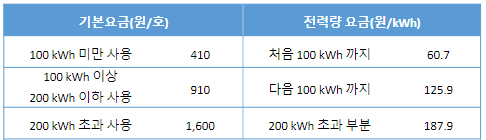

In [103]:
def electricPay(use_electric):
    if use_electric < 100 :
        Normal_Pay = 410
        e_Pay =  60.7 * use_electric

    if 100 <= use_electric <= 200 :
        Normal_Pay = 910
        e_Pay =  60.7 * 100 + (use_electric - 100)* 125.9

    if 200 < use_electric :
        Normal_Pay = 1600
        e_Pay =  60.7 * 100 + (100) * 125.9 + (use_electric - 200) *187.9
        
    result = e_Pay + Normal_Pay
    return int(result+ result*0.1 + result*0.037)


In [105]:
use_electric = 100
electricPay(use_electric)

7936

### 실습 2

#### + 와 - 번갈아 가면서 출력하려고 하며, 몇 개를 출력 할지는 입력을 받아 입력된 개수만큼 출력하라.

In [140]:
pm = "+-"
Count = int(input("몇개를 출력할까요?"))

result = pm*int((Count+1)/2)
result = result[:Count]
print(f"\n{result}")

몇개를 출력할까요?12

+-+-+-+-+-+-


### 실습 3
#### 1부터 12까지 for loop를 활용하여 출력하는 데, 8은 건너뛰고 출력하라.

In [142]:
for i in range(1,12):
    if i == 8:
        continue
    print(i)

1
2
3
4
5
6
7
9
10
11


### 실습 4
#### 사용자에게 정수를 입력 받아, root ** pwr 값이 사용자가 입력 한 정수와 같은 두 개의 정수 root 및 pwr을 찾아 출력하라(단, 1< pwr < 6). 
#### 그러한 정수 쌍이 없으면 결과가 없음을 출력하라.
> root ** pwr은 root를 pwr 만큼 거듭제곱하였다는 뜻이다. 예를 들어 2**3은 2의 세 제곱이며 값은 8이다.

In [154]:
User_number = 230
rem_root = 0
rem_pwr = 0
for root in range(1,int(User_number/2) ):
    for pwr in range(1,6):
        if User_number == root ** pwr:
            rem_root = root
            rem_pwr = pwr
if rem_root != 0 :
    print(f"{User_number}는 {rem_root}의 {rem_pwr} 승 으로 되어있습니다.")
else :
    print(f"없습니다")

없습니다


In [151]:
11 **2

121